# Proyecto: Estimación de costos de equipo para proyectos de construcción.
## 4. Análisis exploratorio - Limpieza y preprocesamiento 

Para esta parte del proyecto se llevará a cabo el siguiente esquema en código

```mermaid
    graph LR
        A[Cargar dataset]-->B[Parsear fechas y precios]
        B-->C[Limpiar datos]
        C-->D[Calculo de algunas métricas]
```

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

In [3]:
DATA_DIR = "C:/Users/nat27/Desktop/Desktop/Proyectos/CienciaDatos/equipment-cost-estimation/data/raw"

### Carga de datos - Parseo - Limpieza - Calculo de algunas métricas 

**Para los datos de X**

In [4]:
# 1. Cargar dataset

# Leer X tal cual
X = pd.read_csv(Path(DATA_DIR) / "X.csv")

# Asegurar nombres estándar
X = X.rename(columns={c: c.strip() for c in X.columns})
# Parsear fecha y precio
X["Date"] = pd.to_datetime(X["Date"], errors="coerce")
X["Price"] = pd.to_numeric(X["Price"], errors="coerce")

# Limpiar: quitar nulos, duplicados por fecha, ordenar
X = (X.dropna(subset=["Date","Price"])
       .drop_duplicates(subset=["Date"])
       .sort_values("Date")
       .reset_index(drop=True))


# Calcular las métricas
precio_maximo = X["Price"].max()
precio_minimo = X["Price"].min()
fecha_mas_antigua = X["Date"].min()
fecha_mas_reciente = X["Date"].max()

# Encontrar las fechas donde ocurren los precios extremos
fecha_precio_max = X.loc[X["Price"] == precio_maximo, "Date"].iloc[0]
fecha_precio_min = X.loc[X["Price"] == precio_minimo, "Date"].iloc[0]

# Calcular métricas adicionales
total_registros = len(X)
rango_fechas_dias = (fecha_mas_reciente - fecha_mas_antigua).days
rango_precios = precio_maximo - precio_minimo
precio_promedio = X["Price"].mean()

# Crear DataFrame resumen más completo
resumen_X = pd.DataFrame({
    "Métrica": [
        "Precio máximo", 
        "Precio mínimo", 
        "Precio promedio",
        "Rango de precios",
        "Fecha más antigua", 
        "Fecha más reciente",
        "Fecha del precio máximo",
        "Fecha del precio mínimo",
        "Total de registros",
        "Rango de fechas (días)",
        "Precio inicial",
        "Precio final"
    ],
    "Valor": [
        f"${precio_maximo:,.2f}",
        f"${precio_minimo:,.2f}",
        f"${precio_promedio:,.2f}",
        f"${rango_precios:,.2f}",
        fecha_mas_antigua.strftime("%Y-%m-%d"),
        fecha_mas_reciente.strftime("%Y-%m-%d"),
        fecha_precio_max.strftime("%Y-%m-%d"),
        fecha_precio_min.strftime("%Y-%m-%d"),
        f"{total_registros:,}",
        f"{rango_fechas_dias:,} días",
        f"${X['Price'].iloc[0]:,.2f}",  # Precio inicial
        f"${X['Price'].iloc[-1]:,.2f}"   # Precio final
    ]
})

resumen_X


,Métrica,Valor
0,Precio máximo,$146.08
1,Precio mínimo,$9.64
2,Precio promedio,$51.32
3,Rango de precios,$136.44
4,Fecha más antigua,1988-06-27
5,Fecha más reciente,2024-04-04
6,Fecha del precio máximo,2008-07-03
7,Fecha del precio mínimo,1998-12-10
8,Total de registros,"9,144"
9,Rango de fechas (días),"13,065 días"


**Para los datos de Y**

In [5]:
# Leer con separador ';'
Y = pd.read_csv(Path(DATA_DIR) / "Y.csv", sep=";", engine="python")

# Si viene en una sola columna tipo "Date;Price", la separamos
if Y.shape[1] == 1:
    col = Y.columns[0]
    Y = Y[col].astype(str).str.split(";", expand=True)
    # Forzar nombres
    Y.columns = ["Date", "Price"][:Y.shape[1]]

# Normalizar nombres
Y = Y.rename(columns={c: c.strip().title() for c in Y.columns})

# Asegurar que existan Date y Price (por si llegaron en otro orden)
if "Date" not in Y.columns or "Price" not in Y.columns:
    print("Columnas Y:", list(Y.columns))

# Parseos
# Fechas con posible formato día/mes/año
Y["Date"] = pd.to_datetime(Y["Date"], errors="coerce", dayfirst=True)
# Precios a numérico, quitando comas de miles si existieran
Y["Price"] = (Y["Price"].astype(str)
                        .str.replace(",", "", regex=False)
                        .str.replace(" ", "", regex=False))
Y["Price"] = pd.to_numeric(Y["Price"], errors="coerce")


# Limpieza
Y = (Y.dropna(subset=["Date","Price"])
       .drop_duplicates(subset=["Date"])
       .sort_values("Date")
       .reset_index(drop=True))


# Calcular las métricas
precio_maximo = Y["Price"].max()
precio_minimo = Y["Price"].min()
fecha_mas_antigua = Y["Date"].min()
fecha_mas_reciente = Y["Date"].max()

# Encontrar las fechas donde ocurren los precios extremos
fecha_precio_max = Y.loc[Y["Price"] == precio_maximo, "Date"].iloc[0]
fecha_precio_min = Y.loc[Y["Price"] == precio_minimo, "Date"].iloc[0]

# Calcular métricas adicionales
total_registros = len(Y)
rango_fechas_dias = (fecha_mas_reciente - fecha_mas_antigua).days
rango_precios = precio_maximo - precio_minimo
precio_promedio = Y["Price"].mean()

# Crear DataFrame resumen más completo
resumen_Y = pd.DataFrame({
    "Métrica": [
        "Precio máximo", 
        "Precio mínimo", 
        "Precio promedio",
        "Rango de precios",
        "Fecha más antigua", 
        "Fecha más reciente",
        "Fecha del precio máximo",
        "Fecha del precio mínimo",
        "Total de registros",
        "Rango de fechas (días)",
        "Precio inicial",
        "Precio final"
    ],
    "Valor": [
        f"${precio_maximo:,.2f}",
        f"${precio_minimo:,.2f}",
        f"${precio_promedio:,.2f}",
        f"${rango_precios:,.2f}",
        fecha_mas_antigua.strftime("%Y-%m-%d"),
        fecha_mas_reciente.strftime("%Y-%m-%d"),
        fecha_precio_max.strftime("%Y-%m-%d"),
        fecha_precio_min.strftime("%Y-%m-%d"),
        f"{total_registros:,}",
        f"{rango_fechas_dias:,} días",
        f"${Y['Price'].iloc[0]:,.2f}",  # Precio inicial
        f"${Y['Price'].iloc[-1]:,.2f}"   # Precio final
    ]
})

resumen_Y


,Métrica,Valor
0,Precio máximo,"$106,237.00"
1,Precio mínimo,$265.00
2,Precio promedio,"$17,097.00"
3,Rango de precios,"$105,972.00"
4,Fecha más antigua,2006-07-11
5,Fecha más reciente,2023-09-12
6,Fecha del precio máximo,2021-05-12
7,Fecha del precio mínimo,2015-10-30
8,Total de registros,"4,485"
9,Rango de fechas (días),"6,272 días"


**Para los datos de Z**

In [6]:
Z = pd.read_csv(Path(DATA_DIR) / "Z.csv")

# Normalizar nombres
Z = Z.rename(columns={c: c.strip().title() for c in Z.columns})

if "Date" not in Z.columns or "Price" not in Z.columns:
    print("Columnas Z:", list(Z.columns))

Z["Date"] = pd.to_datetime(Z["Date"], errors="coerce")
Z["Price"] = pd.to_numeric(Z["Price"], errors="coerce")

Z = (Z.dropna(subset=["Date","Price"])
       .drop_duplicates(subset=["Date"])
       .sort_values("Date")
       .reset_index(drop=True))

# Calcular las métricas
precio_maximo = Z["Price"].max()
precio_minimo = Z["Price"].min()
fecha_mas_antigua = Z["Date"].min()
fecha_mas_reciente = Z["Date"].max()

# Encontrar las fechas donde ocurren los precios extremos
fecha_precio_max = Z.loc[Z["Price"] == precio_maximo, "Date"].iloc[0]
fecha_precio_min = Z.loc[Z["Price"] == precio_minimo, "Date"].iloc[0]

# Calcular métricas adicionales
total_registros = len(Z)
rango_fechas_dias = (fecha_mas_reciente - fecha_mas_antigua).days
rango_precios = precio_maximo - precio_minimo
precio_promedio = Z["Price"].mean()

# Crear DataFrame resumen más completo
resumen_Z = pd.DataFrame({
    "Métrica": [
        "Precio máximo", 
        "Precio mínimo", 
        "Precio promedio",
        "Rango de precios",
        "Fecha más antigua", 
        "Fecha más reciente",
        "Fecha del precio máximo",
        "Fecha del precio mínimo",
        "Total de registros",
        "Rango de fechas (días)",
        "Precio inicial",
        "Precio final"
    ],
    "Valor": [
        f"${precio_maximo:,.2f}",
        f"${precio_minimo:,.2f}",
        f"${precio_promedio:,.2f}",
        f"${rango_precios:,.2f}",
        fecha_mas_antigua.strftime("%Y-%m-%d"),
        fecha_mas_reciente.strftime("%Y-%m-%d"),
        fecha_precio_max.strftime("%Y-%m-%d"),
        fecha_precio_min.strftime("%Y-%m-%d"),
        f"{total_registros:,}",
        f"{rango_fechas_dias:,} días",
        f"${Z['Price'].iloc[0]:,.2f}",  # Precio inicial
        f"${Z['Price'].iloc[-1]:,.2f}"   # Precio final
    ]
})

resumen_Z


,Métrica,Valor
0,Precio máximo,"$3,984.00"
1,Precio mínimo,"$1,421.50"
2,Precio promedio,"$2,037.08"
3,Rango de precios,"$2,562.50"
4,Fecha más antigua,2010-01-01
5,Fecha más reciente,2023-08-31
6,Fecha del precio máximo,2022-03-07
7,Fecha del precio mínimo,2020-04-08
8,Total de registros,"3,565"
9,Rango de fechas (días),"4,990 días"


### Promedio por mes para poder comparar las series

In [7]:
mX = X.set_index("Date")["Price"].resample("MS").mean().dropna()
mY = Y.set_index("Date")["Price"].resample("MS").mean().dropna()
mZ = Z.set_index("Date")["Price"].resample("MS").mean().dropna()

# Un dataframe combinado para trabajar con los tres
monthly = pd.concat([mX.rename("X"), mY.rename("Y"), mZ.rename("Z")], axis=1)
print("Tamaño datos mensual:", monthly.shape)
print("Datos mensuales (promedio por mes):")
monthly.head()


Tamaño datos mensual: (431, 3)
Datos mensuales (promedio por mes):


,X,Y,Z
Date,,,
1988-06-01,15.172500,NaN,NaN
1988-07-01,14.924286,NaN,NaN
1988-08-01,15.009091,NaN,NaN
1988-09-01,13.540909,NaN,NaN
1988-10-01,12.555238,NaN,NaN


### Resumen de todo el período y de los últimos 12 meses

In [17]:
# --- Estadísticos globales
stats_all = pd.DataFrame({
    "mean_all": [mX.mean(), mY.mean(), mZ.mean()],
    "median_all": [mX.median(), mY.median(), mZ.median()],
    "std_all": [mX.std(), mY.std(), mZ.std()],
    "cv_all": [mX.std()/mX.mean(), mY.std()/mY.mean(), mZ.std()/mZ.mean()],
    "min_all": [mX.min(), mY.min(), mZ.min()],
    "max_all": [mX.max(), mY.max(), mZ.max()],
}, index=["X","Y","Z"]).round(3)

# --- Últimos 12 meses 
# último mes en que las 3 series tienen dato (intersección)
common_end = monthly.dropna().index.max()
common_start = common_end - pd.DateOffset(months=11)

X12 = monthly.loc[common_start:common_end, "X"]
Y12 = monthly.loc[common_start:common_end, "Y"]
Z12 = monthly.loc[common_start:common_end, "Z"]

len(X12), len(Y12), len(Z12)

stats_12m = pd.DataFrame({
    "mean_12m": [X12.mean(), Y12.mean(), Z12.mean()],
    "std_12m":  [X12.std(),  Y12.std(),  Z12.std()],
    "p25_12m":  [X12.quantile(0.25), Y12.quantile(0.25), Z12.quantile(0.25)],
    "p75_12m":  [X12.quantile(0.75), Y12.quantile(0.75), Z12.quantile(0.75)],
}, index=["X","Y","Z"]).round(2)


print("Estadisticas globales")
stats_all

Estadisticas globales


,mean_all,median_all,std_all,cv_all,min_all,max_all
X,51.009,45.708,32.939,0.646,10.186,134.565
Y,17137.240,3579.762,22668.200,1.323,469.545,83546.810
Z,2037.607,1989.625,370.499,0.182,1457.045,3537.283


In [18]:
print("Estadísticas de los últimos 12 meses")
stats_12m

Estadísticas de los últimos 12 meses


,mean_12m,std_12m,p25_12m,p75_12m
X,83.45,5.71,79.90,86.39
Y,31650.74,9693.44,24643.06,37640.35
Z,2287.99,108.06,2217.32,2348.60


In [19]:
DATA_CLEAN = "C:/Users/nat27/Desktop/Desktop/Proyectos/CienciaDatos/equipment-cost-estimation/data/clean"
OUT = Path(DATA_CLEAN)
OUT.mkdir(parents=True, exist_ok=True)

monthly.reset_index().rename(columns={"index":"Date"}).to_csv(OUT/"monthly_means_XYZ.csv", index=False)
stats_12m.to_csv(OUT/"stats_12m_common_window.csv")

**Para asegurar comparabilidad, se calculan estadísticas sobre una ventana común de 12 meses definida por el último mes donde las tres materias primas tienen dato y los 11 meses previos. Busco que el “costo base” describa un mismo entorno temporal**

### Graficas globales

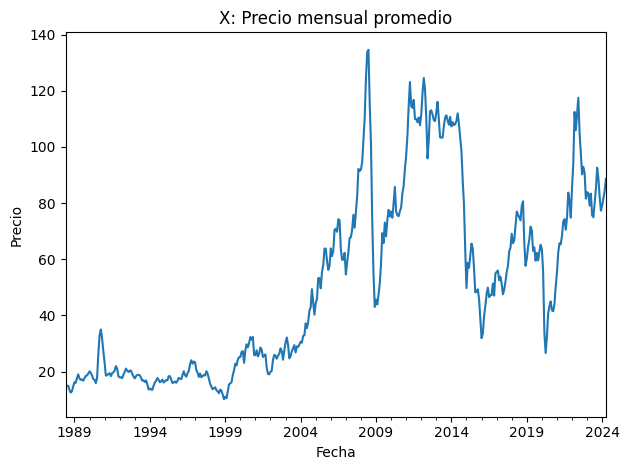

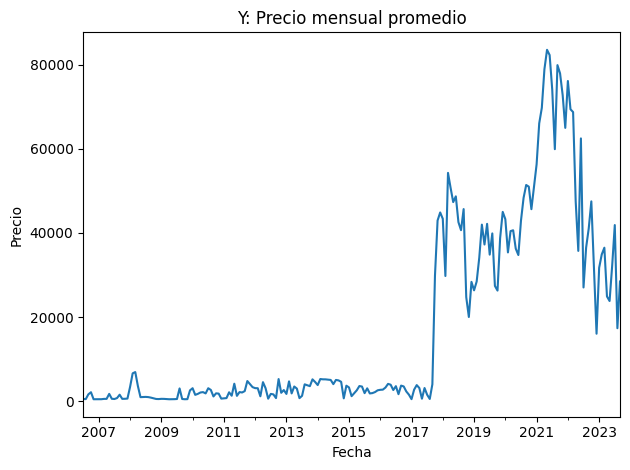

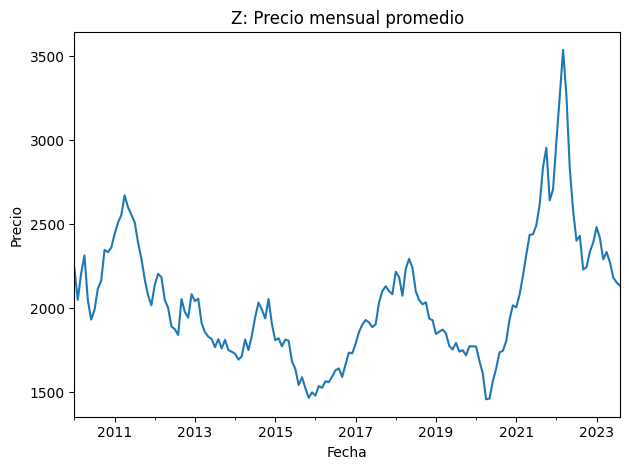

<Figure size 640x480 with 0 Axes>

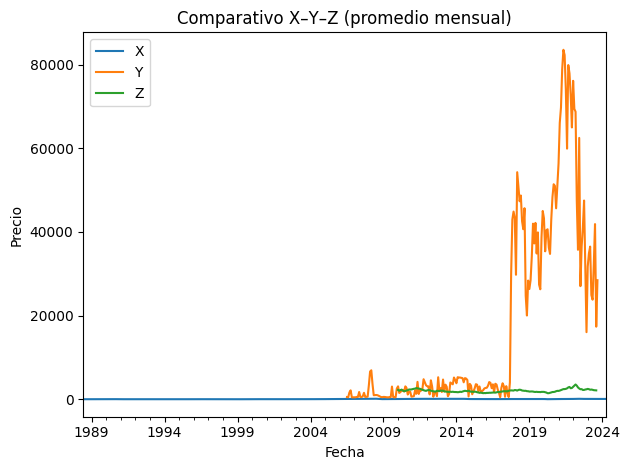

In [16]:
import matplotlib.pyplot as plt

plt.figure(); mX.plot(); plt.title("X: Precio mensual promedio"); plt.xlabel("Fecha"); plt.ylabel("Precio"); plt.tight_layout(); plt.show()
plt.figure(); mY.plot(); plt.title("Y: Precio mensual promedio"); plt.xlabel("Fecha"); plt.ylabel("Precio"); plt.tight_layout(); plt.show()
plt.figure(); mZ.plot(); plt.title("Z: Precio mensual promedio"); plt.xlabel("Fecha"); plt.ylabel("Precio"); plt.tight_layout(); plt.show()

plt.figure(); monthly.plot(); plt.title("Comparativo X–Y–Z (promedio mensual)"); plt.xlabel("Fecha"); plt.ylabel("Precio"); plt.tight_layout(); plt.show()



### Gráficas ventana 12 meses 

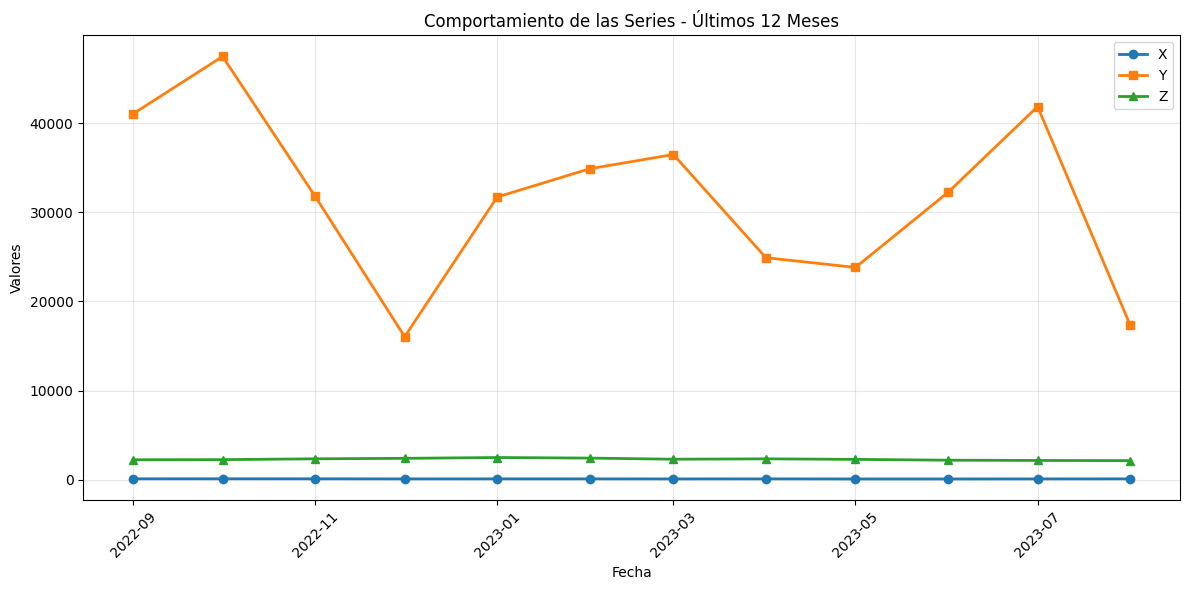

In [24]:
plt.figure(figsize=(12, 6))

plt.plot(X12.index, X12.values, label='X', marker='o', linewidth=2)
plt.plot(Y12.index, Y12.values, label='Y', marker='s', linewidth=2)
plt.plot(Z12.index, Z12.values, label='Z', marker='^', linewidth=2)

plt.title('Comportamiento de las Series - Últimos 12 Meses')
plt.xlabel('Fecha')
plt.ylabel('Valores')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

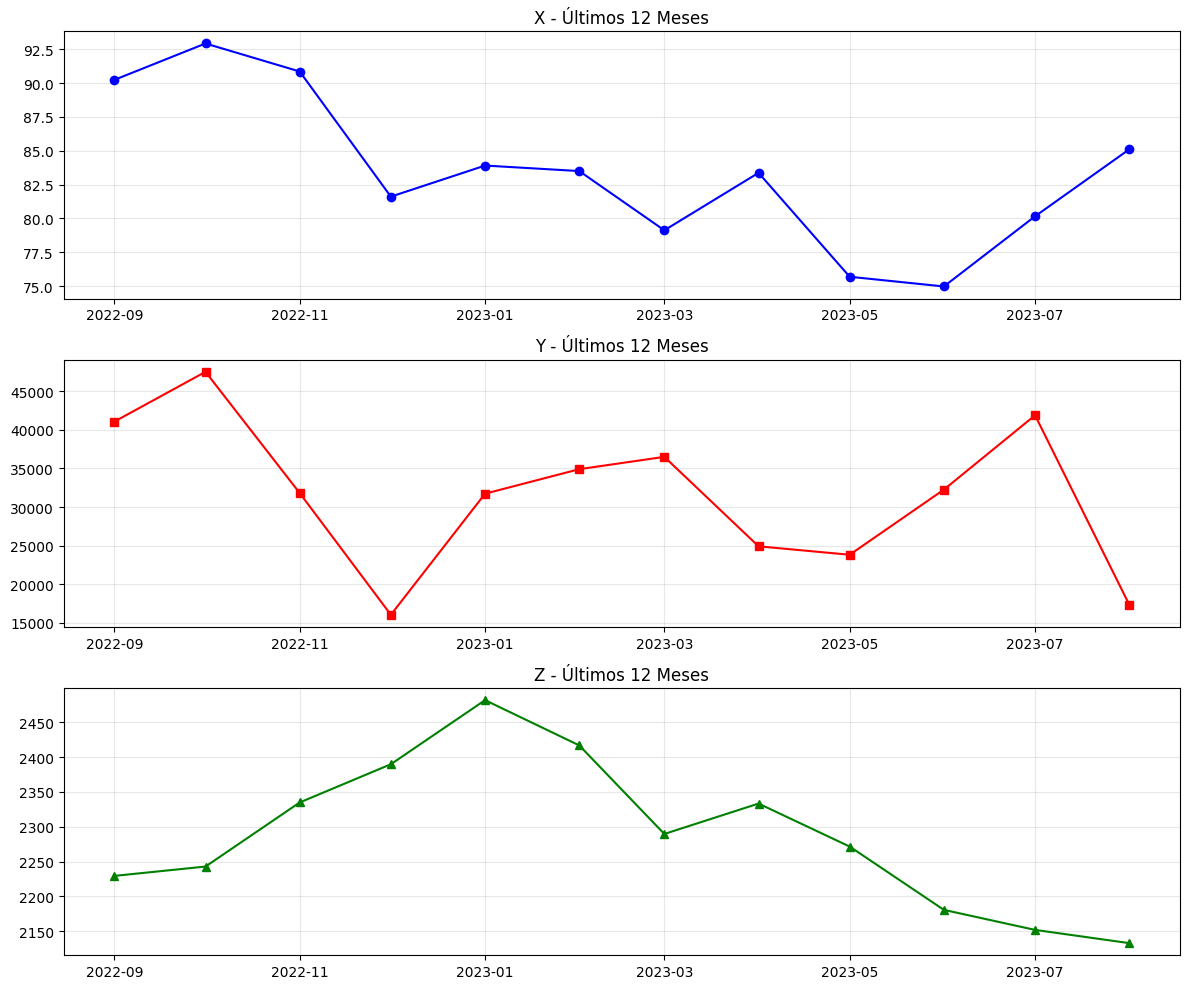

In [22]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 10))

ax1.plot(X12.index, X12.values, color='blue', marker='o')
ax1.set_title('X - Últimos 12 Meses')
ax1.grid(True, alpha=0.3)

ax2.plot(Y12.index, Y12.values, color='red', marker='s')
ax2.set_title('Y - Últimos 12 Meses')
ax2.grid(True, alpha=0.3)

ax3.plot(Z12.index, Z12.values, color='green', marker='^')
ax3.set_title('Z - Últimos 12 Meses')
ax3.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()